In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import serial
import time

2024-03-30 08:55:52.224144: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-30 08:55:52.253853: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-30 08:55:52.254392: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-30 08:55:52.915175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Defining the serial COM
SerialObj = serial.Serial('/dev/ttyACM0')

SerialObj.baudrate = 115200
SerialObj.bytesize = 8
time.sleep(3)

In [3]:
# Defining the batch size and image size
NUM_CLASS = 2
IMAGE_SIZE = (400, 400)
BATCH_SIZE = 32

In [4]:
# Load training data
def load_data(path):
    images = []
    labels = []
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path, filename))
        img = cv2.resize(img, IMAGE_SIZE)  # Resize images to a consistent size
        images.append(img)
        labels.append(path.split('/')[-1])  # Assuming the label is the name of the directory
    return images, labels

def test_image(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMAGE_SIZE)  # Resize image to match training data size
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    if np.argmax(prediction) == 0:
        print("Detected object: Apple")
    else:
        print("Detected object: Banana")

In [5]:
# Paths for the train data and the test data
apple_path = "/home/joe/Indvidual Project/data new/Train/Apple"
banana_path = "/home/joe/Indvidual Project/data new/Train/Banana"
test_path = "/home/joe/Indvidual Project/data new/Test"

In [6]:
# Load training data by apples and bananas
apple_images, apple_labels = load_data(apple_path)
banana_images, banana_labels = load_data(banana_path)

# Combine data and labels
images = np.array(apple_images + banana_images)
labels = np.array(apple_labels + banana_labels)

label_dict = {'Apple': 0, 'Banana': 1}
labels = np.array([label_dict[label] for label in labels])

# Split data into training and testing to start training
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [19]:
# Define the model
model = Sequential([
    # Input layer needs to match the shape of the input data
    Flatten(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Define ModelCheckpoint callback

# Normalize input data to range [0, 1]
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# Train the model using the normalized input data
history = model.fit(X_train_normalized, y_train, epochs=35, batch_size=32, validation_data=(X_test_normalized, y_test), callbacks=None)

# Print test accuracy
test_loss, test_acc = model.evaluate(X_test_normalized, y_test)
print("Test Accuracy:", test_acc)



Epoch 1/35
5/5 [==============================] - 12s 276ms/step - loss: 47.3100 - accuracy: 0.4962 - val_loss: 7.6537 - val_accuracy: 0.5152
Epoch 2/35
5/5 [==============================] - 1s 251ms/step - loss: 20.7125 - accuracy: 0.5496 - val_loss: 39.0795 - val_accuracy: 0.5152
Epoch 3/35
5/5 [==============================] - 1s 255ms/step - loss: 32.1966 - accuracy: 0.5038 - val_loss: 33.0747 - val_accuracy: 0.4848
Epoch 4/35
5/5 [==============================] - 1s 260ms/step - loss: 30.6558 - accuracy: 0.5115 - val_loss: 1.3910 - val_accuracy: 0.6970
Epoch 5/35
5/5 [==============================] - 1s 264ms/step - loss: 13.3829 - accuracy: 0.5496 - val_loss: 7.9193 - val_accuracy: 0.7273
Epoch 6/35
5/5 [==============================] - 1s 261ms/step - loss: 13.0502 - accuracy: 0.7481 - val_loss: 15.9219 - val_accuracy: 0.6364
Epoch 7/35
5/5 [==============================] - 1s 258ms/step - loss: 8.0032 - accuracy: 0.7863 - val_loss: 9.8584 - val_accuracy: 0.5455
Epoch 8/35

In [20]:
# Camera Code to capture the photo for testing
import cv2
import os
import time

def capture_and_save_image(folder_path):
    # Create the folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Open the default camera (usually 0)
    cap = cv2.VideoCapture(0)

    # Check if the camera is opened successfully
    if not cap.isOpened():
        print("Error: Unable to open camera")
        return

    # Allow the camera to adjust to the lighting conditions (1-second delay)
    time.sleep(1)

    # Capture frame-by-frame
    ret, frame = cap.read()

    # Display the captured frame
    cv2.imshow('Captured Image', frame)
    
    # Save the image to the specified folder path
    image_path = os.path.join(folder_path, 'captured_image.jpg')
    cv2.imwrite(image_path, frame)
    
    print("Image saved successfully at:", image_path)

    # Release the camera and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()

# Specify the folder path where the image will be saved
folder_path = r"/home/joe/Indvidual Project/data new/Test"

# Call the function to capture and save the image
capture_and_save_image(folder_path)


Image saved successfully at: /home/joe/Indvidual Project/data new/Test/captured_image.jpg


In [21]:
# Load test images using tf.keras.preprocessing.image_dataset_from_directory
test_dataset_path = "/home/joe/Indvidual Project/data new/Test"
test_images = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_path,
    labels=None,
    color_mode='rgb',
    label_mode=None,
    shuffle=False,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 1 files belonging to 1 classes.


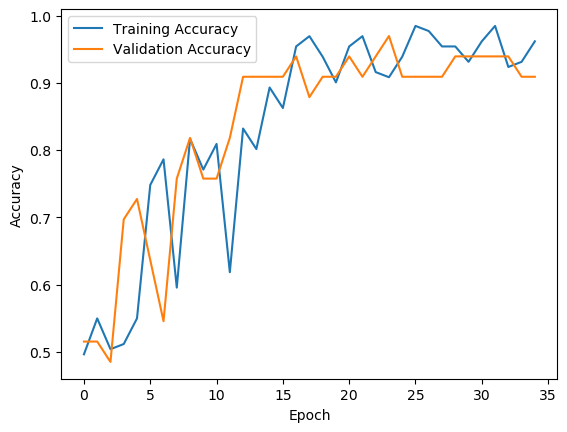

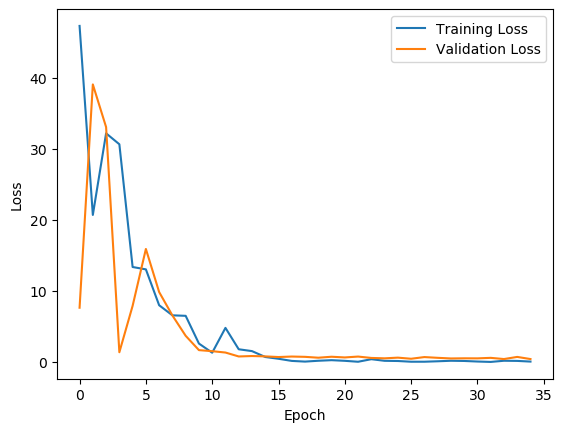

In [23]:
# Plotting Cell
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# Make predictions on test images
print("\nPredictions on test images:")
for images in test_images:
    result = model.predict(images)
    print(result)    


Predictions on test images:
1/1 [==============================] - 0s 82ms/step
[[0.]]


In [25]:
# Control for the ServoMotors
if (result[0][0] >= 0.7) and  (result[0][1] <= 0.5) :
    SerialObj.write(b'1')
elif (result[0][1] >= 0.7) and  (result[0][0] <= 0.5):
    SerialObj.write(b'2')
       

IndexError: index 1 is out of bounds for axis 0 with size 1